## Machine Learning - Part 1; Regression Analysis

### This script contains the following steps:

### 1. Importing Libraries and Data
### 2. Data Cleaning and Value Checking
### 3. Hypothesis 
### 4. Data prep for regression analysis
### 5. Regression Analysis


### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# to ensure that the graphs are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\senja\OneDrive\Documents\5. Learning\6. Data Analytics Immersion\WATSON'

In [4]:
path

'C:\\Users\\senja\\OneDrive\\Documents\\5. Learning\\6. Data Analytics Immersion\\WATSON'

In [5]:
# Import data
df = pd.read_excel(os.path.join(path, '02. Data\WA_Customers.xlsx'))

### 2. Data Cleaning and Value Checking

In [6]:
df.shape

(9134, 20)

In [7]:
# Check for missing values
df.isnull().sum()  # No missing values

Customer ID                      0
State                            0
Location Code                    0
Customer Lifetime Value          0
Coverage                         0
Education                        0
Employment Status                0
Gender                           0
Income                           0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
#Find duplicates
df_dups = df[df.duplicated()]

In [9]:
df_dups.shape # No duplicates

(0, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Location Code                  9134 non-null   object 
 3   Customer Lifetime Value        9134 non-null   float64
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Employment Status              9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [11]:
#check data
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [12]:
#check the median 
df['Customer Lifetime Value'].median()

5780.182197

In [13]:
#check the median 
df['Monthly Premium Auto'].median()

83.0

In [14]:
#check the median 
df['Months Since Last Claim'].median()

14.0

In [15]:
#check the median 
df['Months Since Policy Inception'].median()

48.0

In [16]:
#check the median 
df['Number of Policies'].median()

2.0

In [17]:
#check the median 
df['Total Claim Amount'].median()

383.94543350000004

- check the extreme values for those variables where mean and median are different as dataframe is probably skewed, excluding income. It is already known that approx. 40% of customers have not told their income or they do not have income  based on the previous analysis (income showing 0)

C:\Users\senja\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Density'>

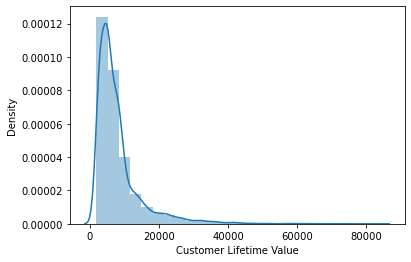

In [18]:
#check extreme values
sns.distplot(df['Customer Lifetime Value'], bins=25)

C:\Users\senja\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

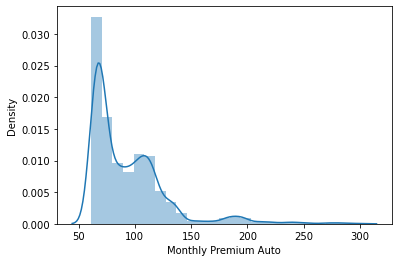

In [19]:
#check extreme values
sns.distplot(df['Monthly Premium Auto'], bins=25)

C:\Users\senja\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Policies', ylabel='Density'>

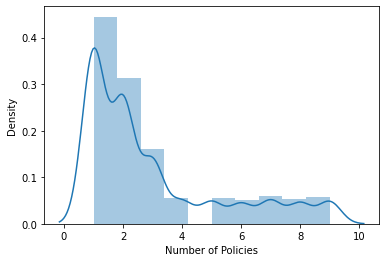

In [20]:
#check extreme values
sns.distplot(df['Number of Policies'], bins=10)

C:\Users\senja\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

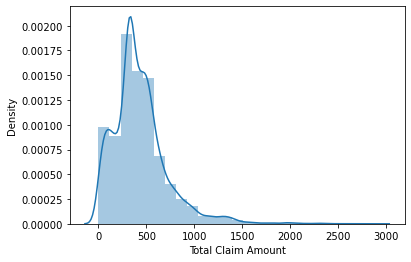

In [21]:
#check extreme values
sns.distplot(df['Total Claim Amount'], bins=25)

In [22]:
# round the desimals
df['Customer Lifetime Value'].round(0)

0        2764.0
1        6980.0
2       12887.0
3        7646.0
4        2814.0
         ...   
9129    23406.0
9130     3097.0
9131     8164.0
9132     7524.0
9133     2612.0
Name: Customer Lifetime Value, Length: 9134, dtype: float64

In [23]:
# round the desimals
df['Total Claim Amount'].round(0)

0        385.0
1       1131.0
2        566.0
3        530.0
4        138.0
         ...  
9129     198.0
9130     379.0
9131     791.0
9132     691.0
9133     370.0
Name: Total Claim Amount, Length: 9134, dtype: float64

In [24]:
# round the desimals
df['Monthly Premium Auto'].round(0)

0        69
1        94
2       108
3       106
4        73
       ... 
9129     73
9130     79
9131     85
9132     96
9133     77
Name: Monthly Premium Auto, Length: 9134, dtype: int64

### 3. Hypothesis 

### "The total amount of claim increases, as the customers' monthly payment also rises" 

### 4. Data prep for regression analysis 

- X is generally capitalized while y isn’t. This standardised notation across the board for independent and dependent variables is used in this analysis

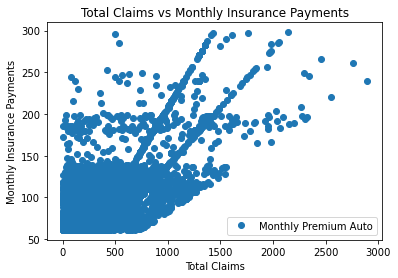

In [25]:
# Create a scatterplot using matplotlib for a look at how the chosen variables plot against each other.

df.plot(x = 'Total Claim Amount', y='Monthly Premium Auto',style='o') # The style option creates a scatterplot; without it, I only have lines.
plt.title('Total Claims vs Monthly Insurance Payments')  
plt.xlabel('Total Claims')  
plt.ylabel('Monthly Insurance Payments')  
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Total Claim Amount'].values.reshape(-1,1)
y = df['Monthly Premium Auto'].values.reshape(-1,1)

In [27]:
X

array([[ 384.811147],
       [1131.464935],
       [ 566.472247],
       ...,
       [ 790.784983],
       [ 691.2     ],
       [ 369.6     ]])

In [28]:
y

array([[ 69],
       [ 94],
       [108],
       ...,
       [ 85],
       [ 96],
       [ 77]], dtype=int64)

- Size of the training set is larger than test set. The test data set size in this analysis will include 30% of the data. Thus making the training set 70% of the data

In [29]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression Analysis

- firstly, the model to be fit in training dataset followed by a test on test dataset


In [30]:
# Create a regression object, which will be fit onto a training set
regression = LinearRegression()

In [31]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict - This is predicting X_train
y_predicted_train = regression.predict(X_train)

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07551398]]
Mean squared error:  713.9104700328122
R2 score:  0.40286552484225446


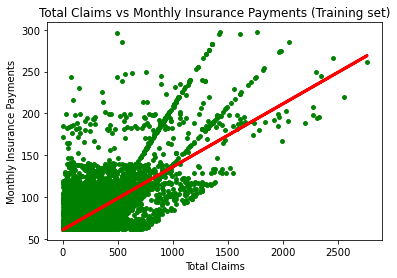

In [35]:
# Visualising the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Claims vs Monthly Insurance Payments (Training set)')
plot_test.xlabel('Total Claims')
plot_test.ylabel('Monthly Insurance Payments')
plot_test.show()

In [36]:
X_train.shape

(6393, 1)

#### Compare how the regression fits the test set

In [37]:
# Predict the values of y using X - This is predicting X_test
y_predicted = regression.predict(X_test)

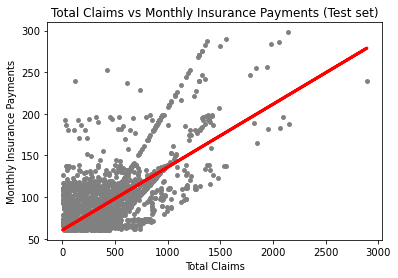

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Claims vs Monthly Insurance Payments (Test set)')
plot_test.xlabel('Total Claims')
plot_test.ylabel('Monthly Insurance Payments')
plot_test.show()

In [39]:
# Create objects that contain the model summary statistics; Mean squared error to and R2 score
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [40]:
# Print the model summary statistics in order to evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07551398]]
Mean squared error:  704.082164030269
R2 score:  0.39103292749470986


In [41]:
y_predicted

array([[ 85.84013277],
       [ 97.43908049],
       [103.60102147],
       ...,
       [156.5625204 ],
       [ 78.47884285],
       [ 86.565067  ]])

In [42]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,70,85.840133
1,68,97.439080
2,119,103.601021
3,239,278.947485
4,126,128.973720
5,116,118.278425
6,112,92.164496
7,94,89.655117
8,93,94.176876
9,88,108.313094


In [43]:
X_test.shape

(2741, 1)

#### check performance improvement after removing outliers

- The Empirical Rule used to identify the extreme outliners, as the data is spread and previous consistency checks/histograms do not provide accurate extreme values.
- The Empirical rule; The 95% of the data lies between ± 2 SD, 24.403357 and 162.035225, 
- Only extreme values above 162 excluded. All values under 162 will be included as this is related to monthly premium payments. 

In [44]:
# Clean the extreme values from the "monthly premium auto" payment variable
df_test = df[df['Monthly Premium Auto'] <=162]

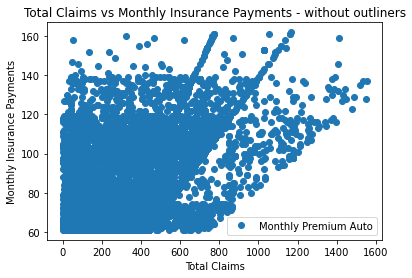

In [45]:
# check how the scatterplot looks without outliers.
df_test.plot(x = 'Total Claim Amount', y='Monthly Premium Auto', style='o')  
plt.title('Total Claims vs Monthly Insurance Payments - without outliners')  
plt.xlabel('Total Claims')  
plt.ylabel('Monthly Insurance Payments')  
plt.show()

In [46]:
# Reshape again
X_2 = df_test['Total Claim Amount'].values.reshape(-1,1)
y_2 = df_test['Monthly Premium Auto'].values.reshape(-1,1)

In [47]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [48]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [49]:
# Predict
y_predicted_2 = regression.predict(X_test_2)

In [50]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04622374]]
Mean squared error:  399.24206551214667
R2 score:  0.2137501208588689


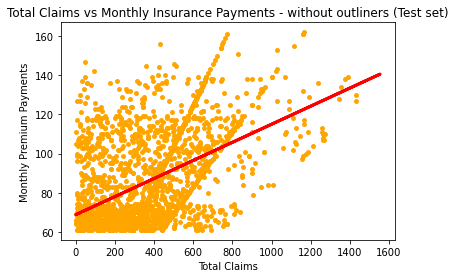

In [52]:
# Visualizing the test set results for the regression without outliners / values >250
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='orange', s = 15)
plot_test.plot(X_train_2, regression.predict(X_train_2), color='red', linewidth =3)
plot_test.title('Total Claims vs Monthly Insurance Payments - without outliners (Test set)')
plot_test.xlabel('Total Claims')
plot_test.ylabel('Monthly Premium Payments')
plot_test.show()

In [53]:
X_test_2.shape

(2603, 1)

#### Analysis 

-  The root mean squared error (MSE) is an estimator that measures the average of the squared difference between the estimated values and the true values. It tells how close a regression line is to a set of points. Smaller the MSE error number is the more efficient the model is as it means that the regression line passes fairly close to the observations, making it a good fit. Mean squared error is 713 in the test set. There are 9134 total datapoints, and the mean is 93.21, meaning that 713 indicates the larger distance away from the regression line (It is easily spotted on the graph). This means that the regression line isn't an accurate representation of the data. The actual and predicted y values are quite difference as well.

- This model has a R-squared value of 0.402 (in test set) meaning that this model explains 0.42 % of the variance in dependent variable (monthly premium auto payment). The training set and test set without outliners showed lower percentages, meaning that they fit even worse than the test set. Thus, this model does not predict very well the relationships; the total claim amounts do not predict the total premium auto payment, and the hypothesis is only partially true.

- Data biases; the dataset itself is based on one month data collection and it might not provide the best possible overall picture of all claim amounts. In addition, the dataset does not include the number of claims (only the total claim values). The high number of the actual claims could have a higher impact on the monthly premium payment than the total claim amounts. 
- The prediction could be more accurate if more datasets and tests result were available, e.g. if the same test had implemented by using data from other months. 